<a href="https://colab.research.google.com/github/rafaeldjsm/Engenharia/blob/main/Avaliacao%20de%20Imoveis/Depreciacao_ross_heidecke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MÉTODO EVOLUTIVO

## O método de Ross considera somente a idade:

$$ k_r=  {\frac {1} {2}} \times  \left[ {\frac {x} {n}} +{\frac {x} {n}}^2 \right]  $$

Sendo:<br>
k: Depreciação física de Ross <br>
x: idade efetiva do imóvel - período de tempo entre a entrada em
serviço até a data da análise;<br>
n: vida útil da edificação - compreende o período de tempo no
qual a edificação se mantém dentro de um limite mínimo de
comportamento em serviço para o qual foi projetada, sem elevados
custos de manutenção e reparação;<br>

## Método de Heidecke
Este método leva em consideração o estado de conservação da benfeitoria.

<img align = "center" src = 'https://raw.githubusercontent.com/rafaeldjsm/Engenharia/master/Avaliacao%20de%20Imoveis/ec_hr.png'/>



Ref   | Estado da construção | $k_h$ : Depreciação (%)|
:---------: | :------: | :------:|
a | Nova | 0,00 %|
b | Entre nova e regular | 0,32 %|
c | Regular | 2,52 %|
d | Entre regular e necessitando de reparos simples| 8,09 %|
e | Reparos simples| 18,10 %|
f | Entre reparos simples e importantes| 33,20 %|
g | Reparos importantes| 52,60 %|
h | Entre reparos importantes e sem valor| 75,20 %|
i | Sem valor | 100,00 %|


## Método de Ross-Heidecke

É a conjunção dos dois métodos e considera a idade e o estado de conservação para calcular a depreciação:

$$ k_{rh}=  k_s + [ 1-k_s] \times c $$

$$ k_{rh}=  {\frac {1} {2}} \times  \left[ {\frac {x} {n}} +{\frac {x} {n}}^2 \right] + \left[ 1-{\frac {1} {2}} \times  \left[ {\frac {x} {n}} +{\frac {x} {n}}^2 \right] \right] \times c $$

Sendo:<br>
c: coeficiente que leva em consideração o estado de conservação do
imóvel, tirado da tabela de Heidecke.

Para estimar a idade referêncial do imóvel e seu valor resídual, utiliza-se a seguinte tabela.

<center>
<img  src = "https://raw.githubusercontent.com/rafaeldjsm/Engenharia/master/Avaliacao%20de%20Imoveis/vr_ir.png"/>
</center>

In [1]:
import pandas as pd
import numpy as np
import ipywidgets as widgets

#@title Escolha e execute para definir o tipo de Grupo e condições físicas

#@markdown ###  Condições Físicas
cf = "Necessitando de reparos simples" #@param ['Nova','Entre Novo e Regular','Regular','Entre regular e necessitando de reparos simples',       'Necessitando de reparos simples',       'Necessitando de reparos simples a importantes',       'Necessitando de reparos importantes',       'Necessitando de reparos importantes a edificação sem valor','Sem Valor']

#@markdown ###  Tipo de Construção
gp = "GALP\xC3O" #@param ['BARRACO','CASA','GALPÃO','COBERTURA','ESCRITÓRIO']

#### Parâmetros de condição física
lcf = ['Nova','Entre Novo e Regular','Regular',
       'Entre regular e necessitando de reparos simples',
       'Necessitando de reparos simples',
       'Necessitando de reparos simples a importantes',
       'Necessitando de reparos importantes',
       'Necessitando de reparos importantes a edificação sem valor',
       'Sem Valor']

lchd = [0.0,0.0032,0.0252,0.0809,0.181,0.332,0.526,0.752,1.0]

#### Parâmetros de padrão construtivo

lpad = ['Padrão Rústico','Padrão Simples','Padrão Rústico','Padrão Proletário',
        'Padrão Econômico','Padrão Simples','Padrão Médio','Padrão Superior',
        'Padrão Fino','Padrão Luxo','Padrão Econômico','Padrão Simples',
        'Padrão Médio','Padrão Superior','Padrão Simples','Padrão Médio',
        'Padrão Superior','Padrão Econômico','Padrão Simples','Padrão Médio',
        'Padrão Superior','Padrão Fino','Padrão Luxo']

lvid = [5,10,60,60,70,70,70,70,60,60,60,60,80,80,20,20,30,70,70,60,60,50,50]

lvr = [0.0, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]

idx = ['BARRACO','BARRACO','CASA','CASA','CASA','CASA','CASA','CASA','CASA','CASA',
       'GALPÃO','GALPÃO','GALPÃO','GALPÃO','COBERTURA','COBERTURA','COBERTURA',
       'ESCRITÓRIO','ESCRITÓRIO','ESCRITÓRIO','ESCRITÓRIO','ESCRITÓRIO','ESCRITÓRIO']

cols = ['Padrão','Idade Referencial','Valor Residual']

tab1 = pd.DataFrame([lpad,lvid,lvr], columns = idx, index = cols).T


In [2]:
#@title Execute para escolher o padrão da construção

# Dataframe contendo apenas os dados do grupo escolhido
df_filt0 = tab1.loc[gp,:]

filt_pad = df_filt0['Padrão'].tolist()
style = {'description_width': 'initial'}
pad = widgets.Dropdown(
    options = filt_pad,
    value = filt_pad[0],
    description='Padrão de Construção:',
    disabled=False,
    style = style
)

display(pad)

Dropdown(description='Padrão de Construção:', options=('Padrão Econômico', 'Padrão Simples', 'Padrão Médio', '…

In [3]:
#@title Execute para escolher o Idade Aparente do Imóvel
# Transformando para o padrão Brasileiro
def usd2rls(s):
    'Função que recebe um float e converte em uma string numérica no formato pt-br'
    return f'{s:,.2f}'.replace(",","@").replace(".",",").replace("@",".")


# Idade Referencial – Ir (anos) e Valor Residual – R (%)

_, idr, vr = df_filt0[df_filt0['Padrão'] == pad.value].values.tolist()[0]

print(f"O Imóvel tem idade Referência de {idr:.0f} anos")


idd = widgets.BoundedIntText(
    value= idr//2,
    min=0,
    max = idr,
    description='Idade Aparente:..........................',
    style = style
)


cub = widgets.FloatText(
    value= 1101.36,
    description ='Custo Unitário Básico:................',
    style = style
)

area = widgets.FloatText(
    value= 2575.0,
    description='Área equivalente da construção:',
    style = style
)


bdi = widgets.FloatSlider(
    value = 0.1835,
    min = 0.0,
    max = 0.35,
    step=0.0001,
    description='BDI (%):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2%',
)

display(idd)
display(cub)
display(area)
display(bdi)

O Imóvel tem idade Referência de 60 anos


BoundedIntText(value=30, description='Idade Aparente:..........................', max=60, style=DescriptionSty…

FloatText(value=1101.36, description='Custo Unitário Básico:................', style=DescriptionStyle(descript…

FloatText(value=2575.0, description='Área equivalente da construção:', style=DescriptionStyle(description_widt…

FloatSlider(value=0.1835, continuous_update=False, description='BDI (%):', max=0.35, readout_format='.2%', ste…

In [4]:
#@title Resultado do método Evolutivo

cri = area.value*cub.value*(1+bdi.value)
print("Custo de reprodução do imóvel é de R$",usd2rls(cri))

xp = idd.value / idr
kr = xp*(xp+1)/2
kh = lchd[lcf.index(cf)]

# kh Incide sobre o valor depreciável (1-vr)
krh = kr + (1-kr)*kh

# % do valor total do imóvel
dt = vr + (1-vr)*(1-krh)

print(f"O coeficiente de Ross é {kr:.2%}")
print(f"O coeficiente de Heidecke é {kh:.2%}")
print(f"O Coeficiente de Ross-Heidecke é {krh:.2%}, incide sobre o valor depreciável")
print(f" total do imóvel será {dt:.2%}, incide sobre o valor total do imóvel")
print(f"O custo de reedição do imóvel será R$",usd2rls(cri*dt))

Custo de reprodução do imóvel é de R$ 3.356.408,37
O coeficiente de Ross é 37.50%
O coeficiente de Heidecke é 18.10%
O Coeficiente de Ross-Heidecke é 48.81%, incide sobre o valor depreciável
 total do imóvel será 60.95%, incide sobre o valor total do imóvel
O custo de reedição do imóvel será R$ 2.045.730,90


In [5]:
#@title ESCOLHA OS PARÂMETROS DE ANÁLISE
def tbrh(xp,kh):
    '''
    Recebe o percentual de idedae aparente do imóvel (xp) e seu coeficiente de Heidecke
    retorna o valor da depreciação física.
    '''
    kr = xp*(xp+1)/2
    return kr + (1-kr)*kh

def tbrh2(xp,ec):
    '''
    Recebe o percentual de idedae aparente do imóvel (xp) e seu estado de conservação
    retorna o valor da depreciação física.
    '''
    kh = lchd[lcf.index(ec)]
    kr = xp*(xp+1)/2
    return kr + (1-kr)*kh



ppi = widgets.FloatText(
    value= 0.75,
    description ='Percentual de idade do imóvel:',
    style = style,
)

ecv = widgets.Dropdown(
    options = lcf,
    value = 'Necessitando de reparos simples',
    description='Padrão de Construção:............',
    disabled=False,
    style = style,
    layout={'width': 'max-content'}
)

display(ppi,ecv)

FloatText(value=0.75, description='Percentual de idade do imóvel:', style=DescriptionStyle(description_width='…

Dropdown(description='Padrão de Construção:............', index=4, layout=Layout(width='max-content'), options…

In [6]:
print(f"O valor da depreciação de Ross_heidecke é de {tbrh2(ppi.value,ecv.value):.2%}")

O valor da depreciação de Ross_heidecke é de 71.85%


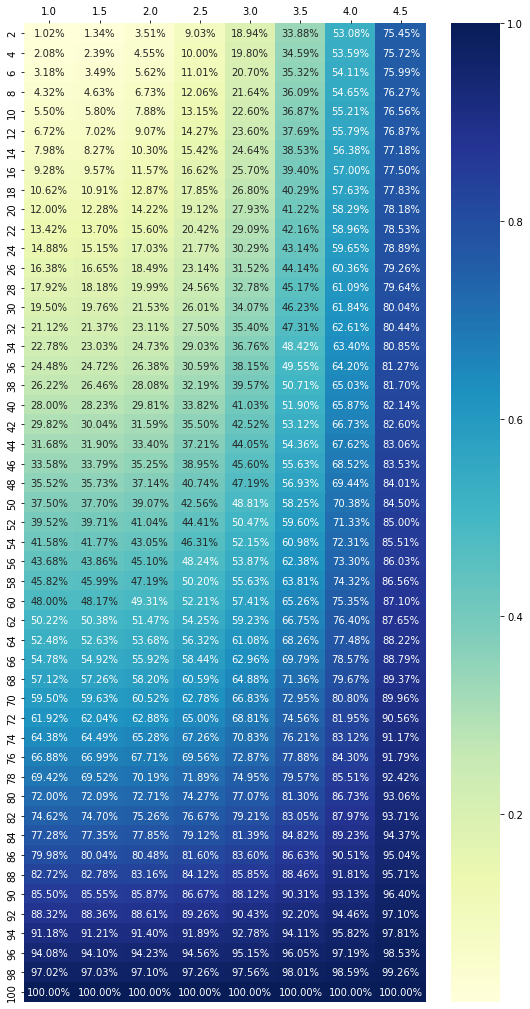

In [7]:
#@title TABELA DOS VALORES DE ROSS-HEIDECKE

idd_ap = (2/100)*np.arange(1,51)

ltbrh = []
for j in idd_ap:
    lit = []
    for k in lchd[:-1]:
        lit.append(tbrh(j,k))
    ltbrh.append(lit)

dfrh = pd.DataFrame(ltbrh, index = [*range(2,102,2)], columns = np.arange(1.0,5.0,0.5))

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 18))
ax = sns.heatmap(dfrh, cmap="YlGnBu", annot=True, fmt=".2%")
ax.xaxis.tick_top() # x axis on top
plt.show()

"Os coeficientes apresentados expressam os Valores de Venda de edificações, que diferem dos seus respectivos custos de reprodução ou de reedição porque já contemplam o Fator de Comercialização médio do mercado para as regiões e período pesquisados. Não obstante, este Fator Comercialização médio já embutido no estudo pode sofrer variações regionais ou temporais e deve ser ajustado às condições específi cas da região em estudo no momento da avaliação, com o emprego do Fator de Ajuste ao Mercado."(IBAPE, 2019: p.

IBAPE/SP . **Valores de Edificações de Imóveis Urbanos**. 2019